### Random Forrest

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.

It technically is an ensemble method (based on the divide-and-conquer approach) of decision trees generated on a randomly split dataset. This collection of decision tree classifiers is also known as the forest. The individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute. Each tree depends on an independent random sample. In a classification problem, each tree votes and the most popular class is chosen as the final result. In the case of regression, the average of all the tree outputs is considered as the final result. It is simpler and more powerful compared to the other non-linear classification algorithms.

#### How does the algorithm work?

It works in four steps:

    Select random samples from a given dataset.
    Construct a decision tree for each sample and get a prediction result from each decision tree.
    Perform a vote for each predicted result.
    Select the prediction result with the most votes as the final prediction.
<img src = "Random Forest.PNG" >

Usually Decission Tree is low bias and high varience model, it means that when you build a single Decission tree upto its complete depth, it tries to learn each bit and pieces of the Training data including the error as well, but it fails to generelise on the dataset it has never seen before.

So the Decission tree always has low bais and high varience which results in Overffiting of the model.

The Random forrest have multiple decission trees, and each tree is given different sample and different feature set to work with, so that each tree will become so much expert that it tries to reduce the Varience and also Random forrest has a Voting classifier at the output it predicts the result based on the Majority of Votes assigned.
Hence,
#### Random forrest is Low Bais and Low Varience model

Advantages:

It overcomes the problem of overfitting by averaging or combining the results of different decision trees.    Scaling of data does not require in random forest algorithm. It maintains good accuracy even after providing   data without scaling.
The algorithm can be used in both classification and regression problems.
Random Forest algorithms maintains good accuracy even a large proportion of the data is missing.
You can get the relative feature importance, which helps in selecting the most contributing features for the    classifier.

Dis Advantages:

Complexity is the main disadvantage of Random forest algorithms.
More computational resources are required to implement Random Forest algorithm.
Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a p
rediction, all the trees in the forest have to make a prediction for the same given input and then perform       voting on it. This whole process is time-consuming.

In [1]:
# Lets see the implementation of Random Forrest algorithm using Python

import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop(['Id'],axis = 1,inplace=True)

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
y.head()
#X.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
prediction = classifier.predict(X_test)

In [21]:
#Lets check the accuracy using predicted and actual values
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Training data Accuracy: {}".format(classifier.score(X_train,y_train)))
print("Test data Accuracy: {}".format(classifier.score(X_test,y_test)))


Training data Accuracy: 1.0
Test data Accuracy: 0.9777777777777777


In [22]:
accuracy_score(y_test,prediction)

0.9777777777777777

In [23]:
print("Classification Report:\n{}".format(classification_report(y_test,prediction)))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [24]:
print(confusion_matrix(y_test,prediction))

[[12  0  0]
 [ 0 16  1]
 [ 0  0 16]]


In [25]:
classifier.predict([[3,5,4,2]])

array(['Iris-versicolor'], dtype=object)

#### Finding Important Features in Scikit-learn

Here, you are finding important features or selecting features in the IRIS dataset. In scikit-learn, you can perform this task in the following steps:

    First, you need to create a random forests model.
    Second, use the feature importance variable to see feature importance scores.
    Third, visualize these scores using the seaborn library.

In [28]:
imp_features = pd.Series(classifier.feature_importances_,index = X.columns).sort_values(ascending=False)
imp_features

PetalWidthCm     0.467580
PetalLengthCm    0.390582
SepalLengthCm    0.089534
SepalWidthCm     0.052304
dtype: float64

In [29]:
#Lets visualise this with Seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


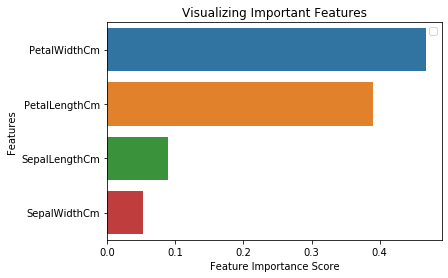

In [32]:
sns.barplot(imp_features,imp_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

Even you can remove SepalWidth feature frm the data set as it has least importance for the target variable to get good accuracy and prediction.